<a href="https://colab.research.google.com/github/vyasaastik/Netflix_Plotly_EDA/blob/main/Netflix_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Step1 : Install and Import Libraries

!pip install pandas matplotlib seaborn --quiet

In [2]:
### Import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

print('Libraries installed and imported')

Libraries installed and imported


In [4]:
### Step2 : Load the Dataset

from google.colab import files
uploaded = files.upload()

## Read the data
df = pd.read_csv('/content/netflix_titles.csv.zip')
df.head()

Saving netflix_titles.csv.zip to netflix_titles.csv (1).zip


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
### Step3  : Data Cleaning

# Check missing values
print(df.isnull().sum())

# Fill the countries with 'Unknown'
df['country'] = df['country'].fillna('Unknown')

# Drop rows with missing cast/director
df = df.dropna(subset=['cast' , 'director'],how='any')

print('\nMissing values after cleaning')
print(df.isnull().sum())

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Missing values after cleaning
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          1
duration        3
listed_in       0
description     0
dtype: int64


<ipython-input-7-b70239c0196e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index , y=type_counts.values , palette='pastel')


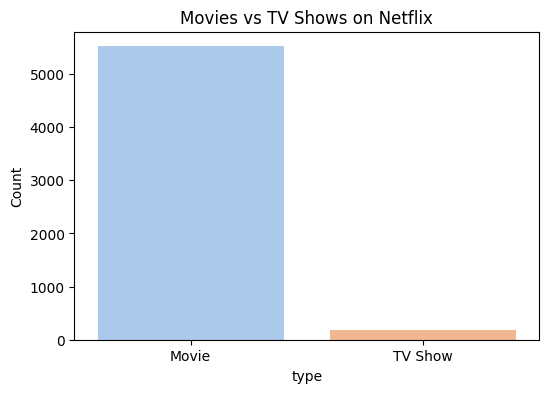

In [7]:
### Step4 :  EDA

# Count by type
type_counts = df['type'].value_counts()

#Plot
plt.figure(figsize = (6,4))
sns.barplot(x=type_counts.index , y=type_counts.values , palette='pastel')
plt.title('Movies vs TV Shows on Netflix')
plt.ylabel('Count')
plt.show()

<ipython-input-8-1a67bbe64346>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index , palette='mako')


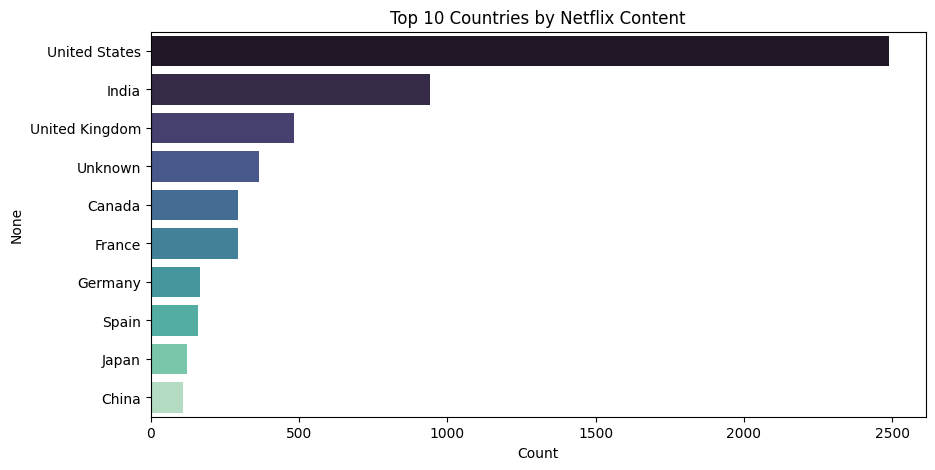

In [8]:
### Top10 countries producing Content

countries = df['country'].str.split(', ' ,expand=True).stack()

# Count and plot top 10
top_countries = countries.value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.values, y=top_countries.index , palette='mako')
plt.title('Top 10 Countries by Netflix Content')
plt.xlabel('Count')
plt.show()

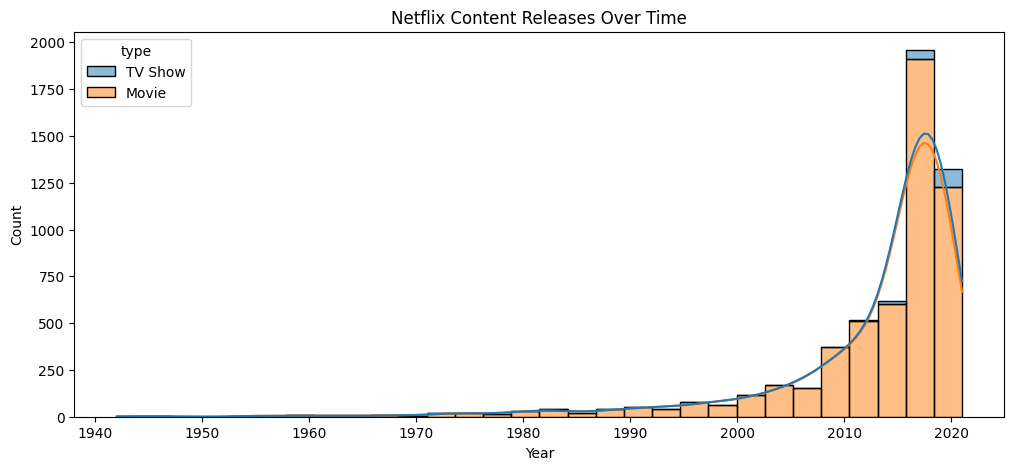

In [10]:
### Step5 :  Time Trends

plt.figure(figsize = (12 , 5))
sns.histplot(data=df , x='release_year' , bins=30 , kde=True , hue='type' , multiple='stack')
plt.title('Netflix Content Releases Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


<ipython-input-12-3df1dc6f7766>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 31.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 70.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 39.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning: 17.2% of the points ca

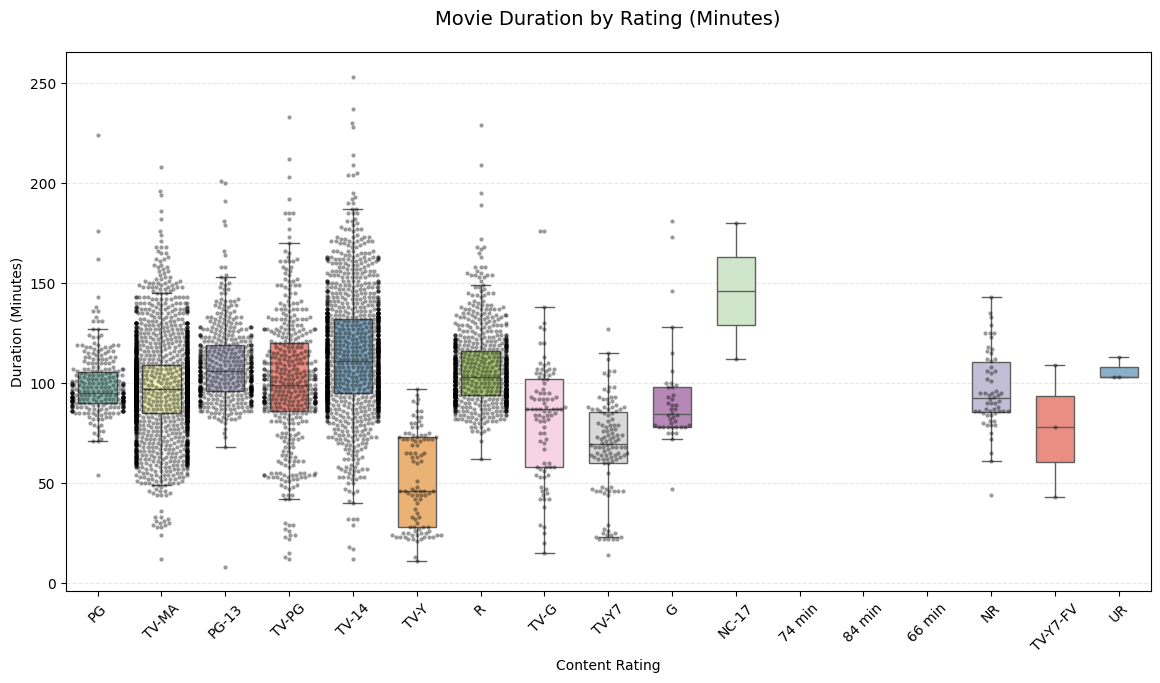

In [12]:
## MultiVariate Analysis

# Extract movie duration
movies = df[df['type'] == 'Movie'].copy()
movies['duration_min'] = movies['duration'].str.extract('(\d+)').astype(float)

plt.figure(figsize=(14,7))
sns.boxplot(
    data = movies,
    x='rating',
    y='duration_min',
    palette='Set3',
    width = 0.6,
    fliersize=0   # Hide outliers
)

sns.swarmplot(
    data = movies,
    x='rating',
    y='duration_min',
    color='black',
    size=3,
    alpha = 0.4
)

plt.title('Movie Duration by Rating (Minutes)', fontsize=14 , pad=20)
plt.xlabel('Content Rating')
plt.ylabel('Duration (Minutes)')
plt.xticks(rotation=45)
plt.grid(axis='y' , linestyle='--' , alpha=0.3)
plt.show()

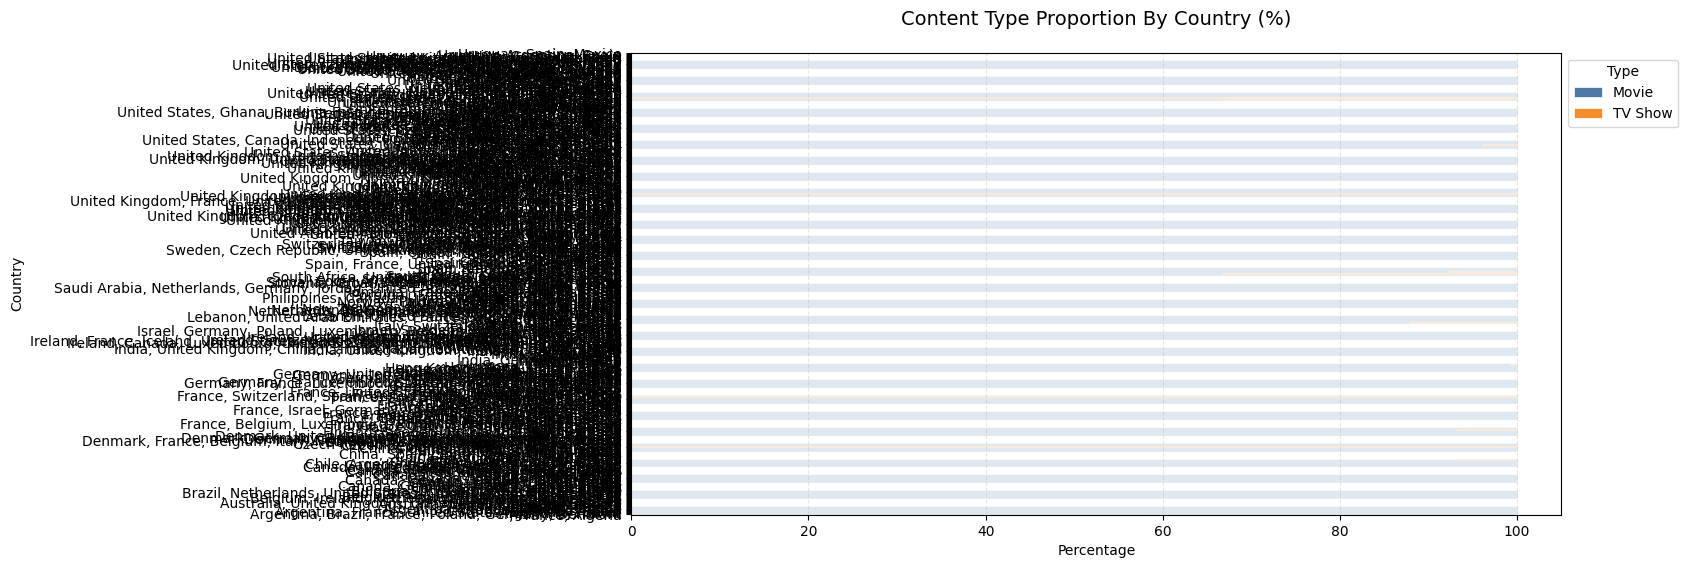

In [14]:
### Composition Analysis

stack_data = (
    df[df['country'].apply(lambda x: any(country in x for country in top_countries.index))]
    .groupby(['country','type'])
    .size()
    .unstack()
    .fillna(0)
)

## Normalize to 100%
stack_data = stack_data.div(stack_data.sum(axis=1) ,axis=0)*100

# Plot
stack_data.plot(
    kind='barh',
    stacked='True',
    figsize=(12,6),
    color=['#4E79A7' , '#F28E2B'],
    edgecolor = 'white',
    linewidth=0.5

)

plt.title('Content Type Proportion By Country (%)' , fontsize=14 , pad=20)
plt.xlabel('Percentage')
plt.ylabel('Country')
plt.legend(title='Type' , bbox_to_anchor=(1,1))
plt.grid(axis='x' , linestyle='--' , alpha=0.3)
plt.show()

In [16]:
### Interactive Netflix EDA With Plotly
!pip install plotly --quiet
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load and prep data
df = pd.read_csv('/content/netflix_titles.csv (1).zip')
df['date_added'] = pd.to_datetime(df['date_added'].str.strip())
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month_name()
movies = df[df['type'] == 'Movie'].copy()
movies['duration_min'] = movies['duration'].str.extract('(\d+)').astype(float)

In [17]:
### Interactive Time Trend Analysis

# Prepare data
timeline = df.groupby(['year_added', 'type']).size().unstack().fillna(0)

fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add bars (primary axis)
fig.add_trace(
    go.Bar(
        x=timeline.index,
        y=timeline['Movie'],
        name='Movies',
        marker_color='#FF6B6B',
        opacity=0.7
    ),
    secondary_y=False
)

# Add line (secondary axis)
fig.add_trace(
    go.Scatter(
        x=timeline.index,
        y=timeline['TV Show'],
        name='TV Shows',
        mode='lines+markers',
        line=dict(color='#4E79A7', width=3),
        marker=dict(size=8)
    ),
    secondary_y=True
)

# Style layout
fig.update_layout(
    title='<b>Netflix Content Added by Year</b><br><i>Movies (Count) vs TV Shows (Trend)</i>',
    xaxis_title='Year',
    yaxis_title='Movies Added (Count)',
    yaxis2_title='TV Shows Added (Count)',
    template='plotly_white',
    hovermode='x unified',
    height=500
)
fig.show()

In [18]:
### Geographic Heatmap (Global Content Production)

#Process country data
country_counts = (
    df['country'].str.split(', ', expand=True)
    .stack()
    .value_counts()
    .reset_index()
    .rename(columns={'index': 'country', 0: 'count'})
)

fig = px.choropleth(
    country_counts.head(30),
    locations='country',
    locationmode='country names',
    color='count',
    hover_name='country',
    color_continuous_scale='Peach',
    title='<b>Global Netflix Content Production</b>'
)

fig.update_layout(
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection_type='natural earth'
    ),
    margin={"r":0,"t":40,"l":0,"b":0}
)
fig.show()



In [19]:
### Interactive Genre Sunburst (Hierarchical Genre Relationships)

# Process genre data
df['main_genre'] = df['listed_in'].str.split(',').str[0].str.strip()

fig = px.sunburst(
    df[df['main_genre'].notna()],
    path=['type', 'main_genre'],
    color_discrete_sequence=px.colors.qualitative.Pastel,
    title='<b>Content Type → Genre Hierarchy</b>'
)

fig.update_traces(
    textinfo='label+percent parent',
    insidetextorientation='radial'
)
fig.update_layout(margin=dict(t=40, l=0, r=0, b=0))
fig.show()

In [20]:
### Dynamic Scatter Plot (Movie Duration vs. Release Year)

fig = px.scatter(
    movies.dropna(subset=['duration_min']),
    x='release_year',
    y='duration_min',
    color='rating',
    size='duration_min',
    hover_name='title',
    hover_data=['country', 'director'],
    title='<b>Movie Duration Trends by Rating</b>',
    labels={'duration_min': 'Duration (mins)', 'release_year': 'Release Year'},
    height=600
)

fig.update_layout(
    xaxis_range=[1980, 2023],
    yaxis_range=[0, 250],
    hoverlabel=dict(bgcolor="white", font_size=12)
)
fig.show()



In [21]:
### Animated Bar Chart (Genre Popularity Over Time)

# Prepare genre-year data
genre_yearly = (
    df.assign(genre=df['listed_in'].str.split(', '))
    .explode('genre')
    .groupby(['release_year', 'genre'])
    .size()
    .reset_index(name='count')
    .query('count > 10 and release_year >= 2000')
)

fig = px.bar(
    genre_yearly,
    x='genre',
    y='count',
    animation_frame='release_year',
    range_y=[0, 150],
    color='genre',
    title='<b>Genre Popularity Evolution (2000-2021)</b>'
)

fig.update_layout(
    showlegend=False,
    xaxis_title=None,
    yaxis_title='Titles Added',
    updatemenus=[dict(type='buttons', showactive=False)]
)
fig.show()

In [23]:
### Animated Bubble Map ()Global Content Expansion (2000-2021)

country_yearly = (
    df.assign(country=df['country'].str.split(', ').str[0])
    .groupby(['country', 'release_year'])
    .size()
    .reset_index(name='count')
    .query('count > 5 and release_year >= 2000')
)

fig = px.scatter_geo(
    country_yearly,
    locations='country',
    locationmode='country names',
    size='count',
    animation_frame='release_year',
    projection='natural earth',
    color_continuous_scale='Rainbow',
    title='<b>Netflix Global Content Expansion</b>',
    hover_name='country',
    hover_data=['count'],
    height=650
)

fig.update_layout(geo=dict(showland=True, landcolor='lightgray'))
fig.show()

In [31]:
### 3D Surface Plot(Genre Popularity Over Time)

# Prepare genre-year matrix
genre_matrix = (
    df.assign(genre=df['listed_in'].str.split(', ').str[0])
    .groupby(['release_year', 'genre'])
    .size()
    .unstack()
    .fillna(0)
    .rolling(3).mean()
    .reset_index()
    .melt(id_vars='release_year', var_name='genre', value_name='count')
    .query('2000 <= release_year <= 2021')
)

fig = go.Figure(data=[
    go.Surface(
        z=genre_matrix.pivot(index='release_year', columns='genre', values='count').values,
        x=genre_matrix['genre'].unique(),
        y=genre_matrix['release_year'].unique(),
        colorscale='Electric'
    )
])

fig.update_layout(
    title='<b>Genre Popularity Waves (3-Year Rolling Avg)</b>',
    scene=dict(
        xaxis_title='Genre',
        yaxis_title='Year',
        zaxis_title='Titles Added',
        camera=dict(eye=dict(x=1.5, y=-1.5, z=0.5))
    )
)
fig.show()